# TALLER BÁSICO DE MANIPULACIÓN DE SEÑALES BIOMÉDICAS

# Bioseñales

Las señales que vamos a manipular son señales digitales que se obtienen a partir de procesos físicos, en nuestro caso producidos por el cuerpo humano, mediante un par de procesos: muestreo y cuantización. Esto implica que al final obtengamos un conjunto de puntos ordenados que representan la señal que generó el sistema físico

![analog-signals-to-digital-signals2.png](analog-signals-to-digital-signals2.png)
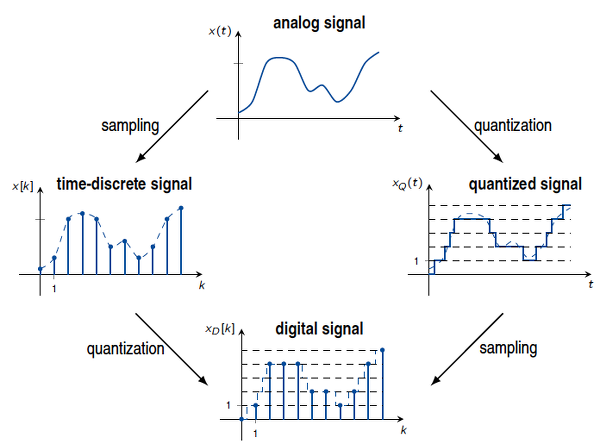

Los canales o sensores son los medios que permiten capturar el fenómeno físico, en este caso, la aparición de un voltaje

![eeg-2680957_960_720.jpg](eeg-2680957_960_720.jpg)
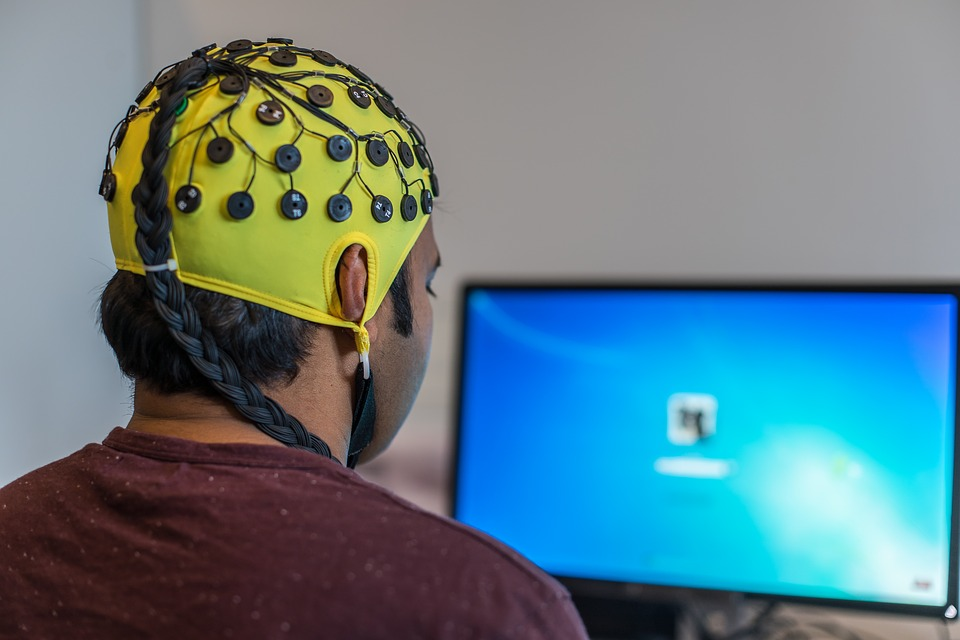

## Librerías básicas

Describir cada una de las librerías para que sirven, qué las caracteriza y consultar sobre las adicionales

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from csv import reader as reader_csv # Carga archivos tipo csv


import scipy.io as sio

## Carga de archivos .mat

In [14]:
mat_contents = sio.loadmat('C001R_EP_reposo.mat') #loading data
print("the loaded keys are: " + str(mat_contents.keys())) #the data is loaded as a Python dictionary


the loaded keys are: dict_keys(['__header__', '__version__', '__globals__', 'data'])


In [15]:
#in the current case the signal is stored in the data field
data = mat_contents['data']
# print(data)

### Atributos básicos

In [16]:
print("Variable python: " + str(type(data)))
print("Tipo de variable cargada: " + str(data.dtype))
print("Dimensiones de los datos cargados: " + str(data.shape))
print("Numero de dimensiones: " + str(data.ndim))
print("Tamanio: " + str(data.size))
# print("Tamanio en bits: " + str(data.itemsize()))
print("Tamanio en memoria (bytes): " + str(data.nbytes)) 

Variable python: <class 'numpy.ndarray'>
Tipo de variable cargada: float64
Dimensiones de los datos cargados: (8, 2000, 180)
Numero de dimensiones: 3
Tamanio: 2880000
Tamanio en memoria (bytes): 23040000


In [17]:
data[2,:,120]
t = np.linspace(0,2,4,endpoint = False)
print(t)
# plt.plot(t,data[0,:,100])
# plt.plot(t,data[1,:,100]+10)
# plt.plot(t,data[2,:,100]+20)
# plt.plot(t,data[3,:,100]+30)
# plt.plot(t,data[4,:,100]+40)
# plt.plot(t,data[5,:,100]+50)
# plt.plot(t,data[6,:,100]+60)
# plt.plot(t,data[7,:,100]+70)

# plt.show()


[0.  0.5 1.  1.5]


Cómo se podría convertir la señal a continua?

Cómo se podría verificar que la señal ha quedado bien convertida?

In [30]:
c,p,e=np.shape(data)
senal_continua = np.reshape(data,(c, p*e),order ='F') # en 2D
print(senal_continua.shape)
senal_graficar =  data[0,:,0] # en 3D

tiempo = np.linspace(0,2,2000,endpoint=False)
tiempo = np.arange(0,2,0.001)
# plt.subplot(121)
# plt.plot(tiempo,senal_graficar,'r-')
# plt.xlabel('Seg')
# plt.ylabel('uV')
# plt.title('Señal sersor 1 , estimulo 13D')
# plt.subplot(122)
# plt.plot(tiempo,senal_continua[0,:2000])

# plt.xlabel('Seg')
# plt.ylabel('uV')
# plt.title('Señal sersor 1 , estimulo 12D')
# plt.subplots_adjust(hspace=0.8, wspace=0.7)

f = plt.Figure()
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)
ax1.plot(tiempo,senal_graficar,'r-')
ax2.plot(tiempo,senal_continua[0,:2000])
plt.show()
# # f.show()

(8, 360000)


## Gráficación básica

Resolver punto en la diapositiva 8

Graficar la distribución o histograma de los puntos

## Tarea - Resolver los mismos puntos usando la interfaz de objetos de matplotlib

Text(0, 0.5, 'uV')

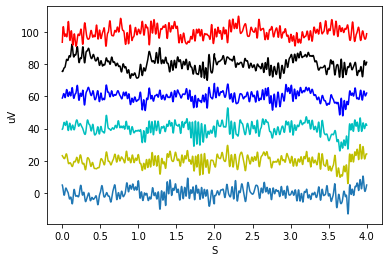

In [7]:
t = np.linspace(0,4,4000)
plt.plot(t,senal_continua[0,:4000])
plt.plot(t,senal_continua[1,:4000]+20,'y-')
plt.plot(t,senal_continua[2,:4000]+40,'c-')
plt.plot(t,senal_continua[3,:4000]+60,'b-')
plt.plot(t,senal_continua[4,:4000]+80,'k-')
plt.plot(t,senal_continua[5,:4000]+100,'r-')
plt.xlabel('S')
plt.ylabel('uV')
plt.show()
ax1.plot()

## Manipulación de señales

La señal P300 es una señal que se obtiene cuando una persona tiene que discriminar un estímulo infrecuente entre muchos frecuentes y que se registra en el EEG como un aumento en el voltaje en las condiciones infrecuentes respecto a las frecuentes alrededor de 300 ms luego de la presentación del estímulo.

La presencia, magnitud, topografía y duración de esta señal se utiliza a veces en la medición de la función cognitiva de los procesos de toma de decisiones.

![Plot-of-the-visual-P300-at-Cz-averaged-across-all-subjects.png](Plot-of-the-visual-P300-at-Cz-averaged-across-all-subjects.png)
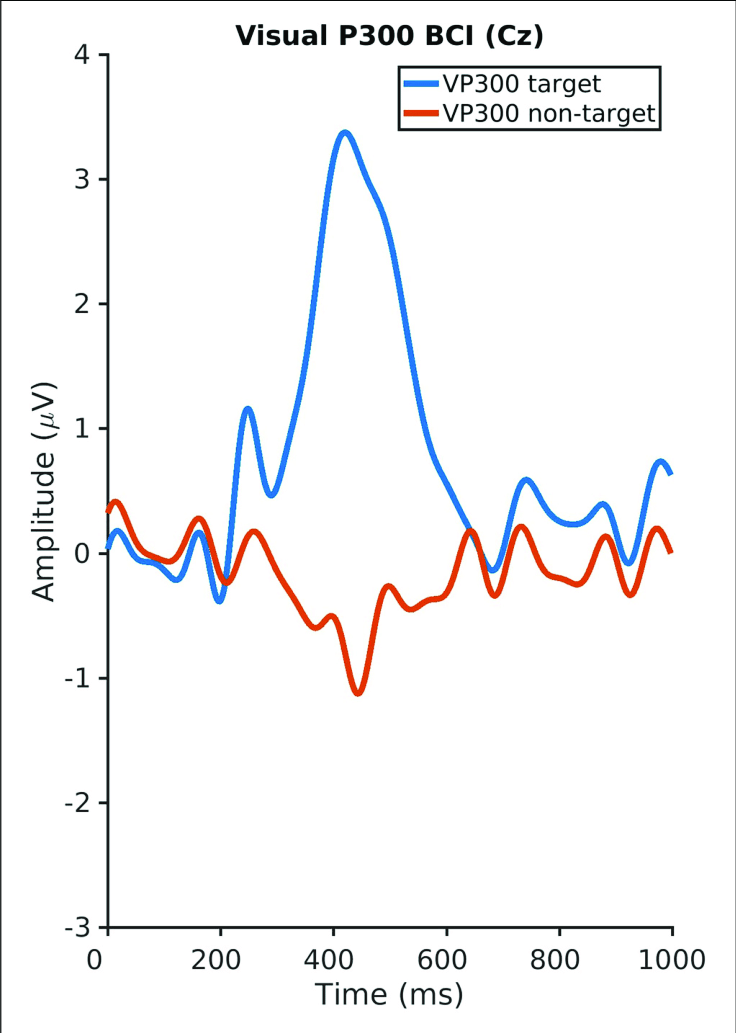

In [3]:
#loading data
mat_contents = sio.loadmat('senales_potencial.mat')

#the data is loaded as a Python dictionary
print("the loaded keys are: " + str(mat_contents.keys()))
#in the current case the signal is stored in the data field
condicion_frecuente = mat_contents['frecuente']
condicion_infrecuente = mat_contents['infrecuente']

the loaded keys are: dict_keys(['__header__', '__version__', '__globals__', 'frecuente', 'infrecuente'])


In [4]:
print("Dimensiones de los datos cargados frecuentes: " + str(condicion_frecuente.shape))
print("Dimensiones de los datos cargados infrecunetes: " + str(condicion_infrecuente.shape))

Dimensiones de los datos cargados frecuentes: (58, 1150, 130)
Dimensiones de los datos cargados infrecunetes: (58, 1150, 20)


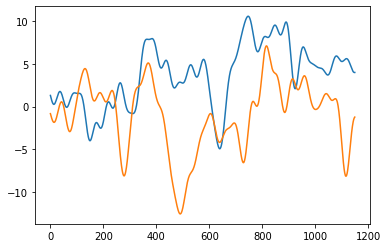

In [7]:
plt.plot(condicion_frecuente[0,:,0])
plt.plot(condicion_infrecuente[0,:,0])

## Visualización del potencial

In [8]:
promedio_frecuentes = np.mean(condicion_frecuente,2)
# promedio_frecuentes1 = np.mean(condicion_frecuente,1)
# promedio_frecuentes = np.mean(condicion_frecuente,2)
promedio_infrecuentes = np.mean(condicion_infrecuente,2)
print(promedio_frecuentes.shape)
print(promedio_infrecuentes.shape)
# print(promedio_frecuentes2.shape)
ax1

(58, 1150)
(58, 1150)


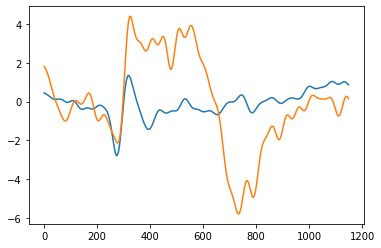

In [9]:
plt.plot(promedio_frecuentes[0,:])
plt.plot(promedio_infrecuentes[0,:])


## Estadística básica

In [10]:
promedio_frecuentes = np.mean(condicion_frecuente,1)
promedio_infrecuentes = np.mean(condicion_infrecuente,1)
print(promedio_frecuentes.shape)
print(promedio_infrecuentes.shape)

(58, 130)
(58, 20)


In [11]:
promedio_frecuentes = np.mean(promedio_frecuentes,1)
promedio_infrecuentes = np.mean(promedio_infrecuentes,1)
print(promedio_frecuentes.shape)
print(promedio_infrecuentes.shape)

(58,)
(58,)


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


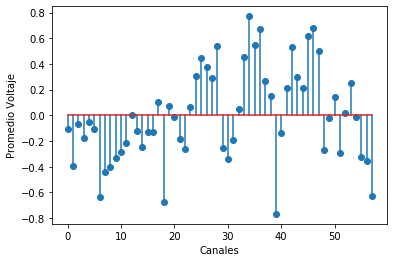

In [12]:
# plt.subplot(221)
plt.stem(promedio_frecuentes)
plt.xlabel("Canales")
plt.ylabel("Promedio Voltaje")
# plt.subplot(224)
# plt.stem(promedio_infrecuentes)
# plt.xlabel("Canales")
# plt.ylabel("Promedio Voltaje")
# plt.subplots_adjust(hspace=0.8, wspace=0.7)
# plt.subplot(223)
# plt.hist(promedio_frecuentes)
# plt.subplot(222)
# plt.hist(promedio_infrecuentes)


plt.show()

In [16]:
std_fre=np.std(condicion_frecuente,1)
std_infre=np.std(condicion_infrecuente,1)
std_fre=np.std(std_fre,1)
std_infre=np.std(std_infre,1)
print(std_fre.shape)
print(std_infre.shape)

(58,)
(58,)


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


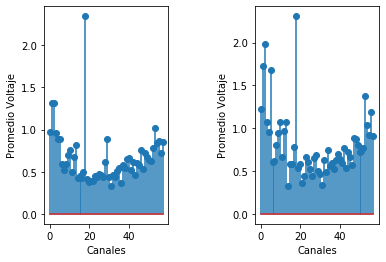

In [17]:
plt.subplot(121)
plt.stem(std_fre)
plt.xlabel("Canales")
plt.ylabel("Promedio Voltaje")
plt.subplot(122)
plt.stem(std_infre)
plt.xlabel("Canales")
plt.ylabel("Promedio Voltaje")
plt.subplots_adjust(hspace=0.8, wspace=0.7)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fed8242988>,
 'caps': [<matplotlib.lines.Line2D at 0x1fed8254948>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fed8328508>,
 'medians': [<matplotlib.lines.Line2D at 0x1fed827a8c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fed827af08>,
 'means': []}

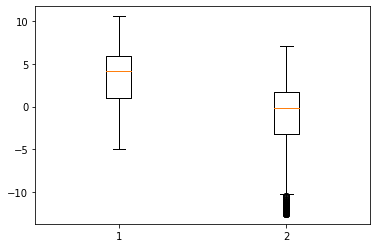

In [18]:
plt.boxplot((condicion_frecuente[0,:,0],condicion_infrecuente[0,:,0]))